![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/Concentracion_AI/SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Concentracion_AI/SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.8 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=d801f7dd2bd4ed32b778d17b914f25312faaf0b82c61158b542e6171e67e819b
  Stored in directory: /root/.cache/pip/wheels/e7/9b/bd/68a22a778e7205e9be1d56c63ff7f4847276618e8be38bb490
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user A01705681@tec.mx password

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Concentracion_AI/SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 357



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Concentracion_AI/SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work1B7E0000AB00_odaws02-usw2-2.oda.sas.com/SAS_work6FA80000AB00_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 43776


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 05:03:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 05:03:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
  table='hist',
  libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
  table='target_rd2',
  libref='cortex'
)

## Merge the Data

In [ ]:
df = pd.merge(data1, data2, on=["ID"],how="right")
df.head(5)


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Data Exploration

In [ ]:
df.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.1,0.149457,9.409665
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.3,0.356539,90.917731
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.0,1.000000,10000.000000


Verificamos si existen registros duplicados

In [ ]:
def drop_duplicates(df):
  return df.drop_duplicates()
df = drop_duplicates(data_merge)
df.describe()

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,...,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,Elementary,High School,University / College,Downtown,Rural,Suburban
count,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,336327.000000,336327.000000,336327.000000,336327.00000,...,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000,987931.000000
mean,0.516648,46.447294,65871.081482,4.624228,0.568094,0.567214,3.039640,1.666896,4.474181,104.45553,...,0.123568,7.766043,0.123696,7.834996,0.029902,0.323220,0.646878,0.157604,0.198202,0.312003
std,0.499723,18.923767,61177.470059,3.315895,1.000935,1.058608,2.120738,1.052097,2.588130,303.76344,...,0.329089,82.721055,0.329234,83.612187,0.170317,0.467706,0.477940,0.364370,0.398645,0.463311
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,20800.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,46.000000,44300.000000,5.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,91900.000000,8.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.00000,...,1.000000,10000.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987931 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Woman                 987931 non-null  float64
 1   Age                   987931 non-null  float64
 2   Salary                987931 non-null  float64
 3   SeniorList            987931 non-null  float64
 4   NbActivities          987931 non-null  float64
 5   Referrals             987931 non-null  float64
 6   Recency               336327 non-null  float64
 7   Frequency             336327 non-null  float64
 8   Seniority             336327 non-null  float64
 9   TotalGift             336327 non-null  float64
 10  MinGift               336327 non-null  float64
 11  MaxGift               336327 non-null  float64
 12  GaveLastYear          987931 non-null  float64
 13  AmtLastYear           987931 non-null  float64
 14  GaveThisYear          987931 non-null  float64
 15  

In [ ]:
# Porcentaje de valores faltantes en el dataframe
df.isnull().sum()/len(data_merge)

Woman                   0.000000
Age                     0.000000
Salary                  0.000000
SeniorList              0.000000
NbActivities            0.000000
Referrals               0.000000
Recency                 0.651604
Frequency               0.651604
Seniority               0.651604
TotalGift               0.651604
MinGift                 0.651604
MaxGift                 0.651604
GaveLastYear            0.000000
AmtLastYear             0.000000
GaveThisYear            0.000000
AmtThisYear             0.000000
Elementary              0.000000
High School             0.000000
University / College    0.000000
Downtown                0.000000
Rural                   0.000000
Suburban                0.000000
dtype: float64

In [ ]:
import seaborn as sns

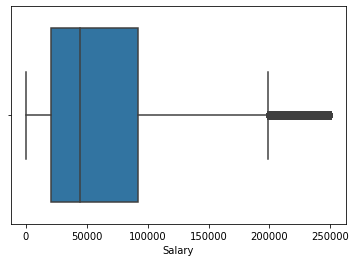

In [ ]:
sns.boxplot(data=df, x="Salary")

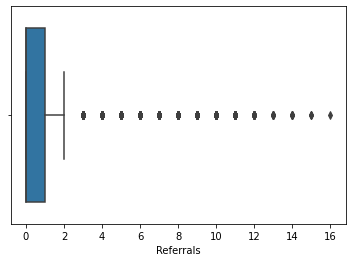

In [ ]:
sns.boxplot(data=df, x="Referrals")

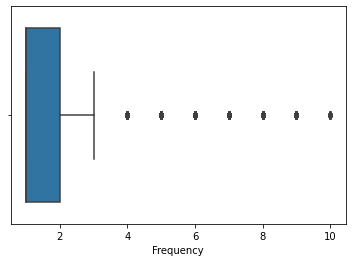

In [ ]:
sns.boxplot(data=df, x="Frequency")

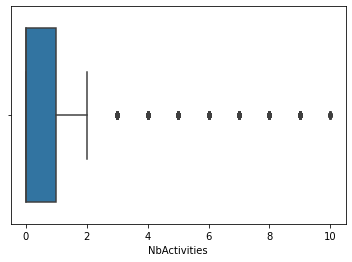

In [ ]:
sns.boxplot(data=df, x="NbActivities")

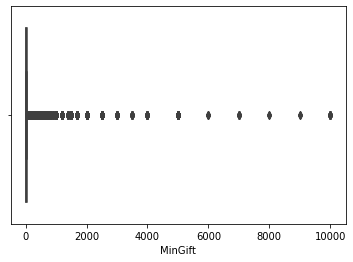

In [ ]:
sns.boxplot(data=df, x="MinGift")

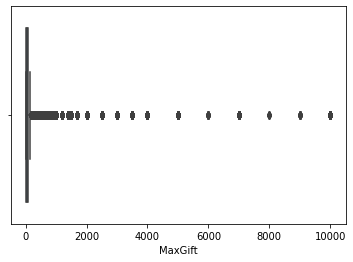

In [ ]:
sns.boxplot(data=df, x="MaxGift")

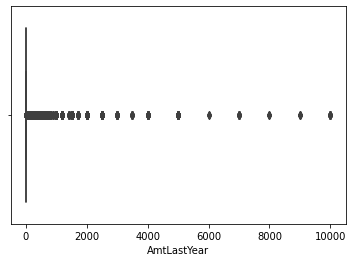

In [ ]:
sns.boxplot(data=df, x="AmtLastYear")

In [ ]:
sns.histplot(data=df, x="Education")

ValueError: ignored

In [ ]:
sns.histplot(data=data_merge, x="City")

ValueError: ignored

## Análisis de Datos

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation matrix for the cortex dataset')

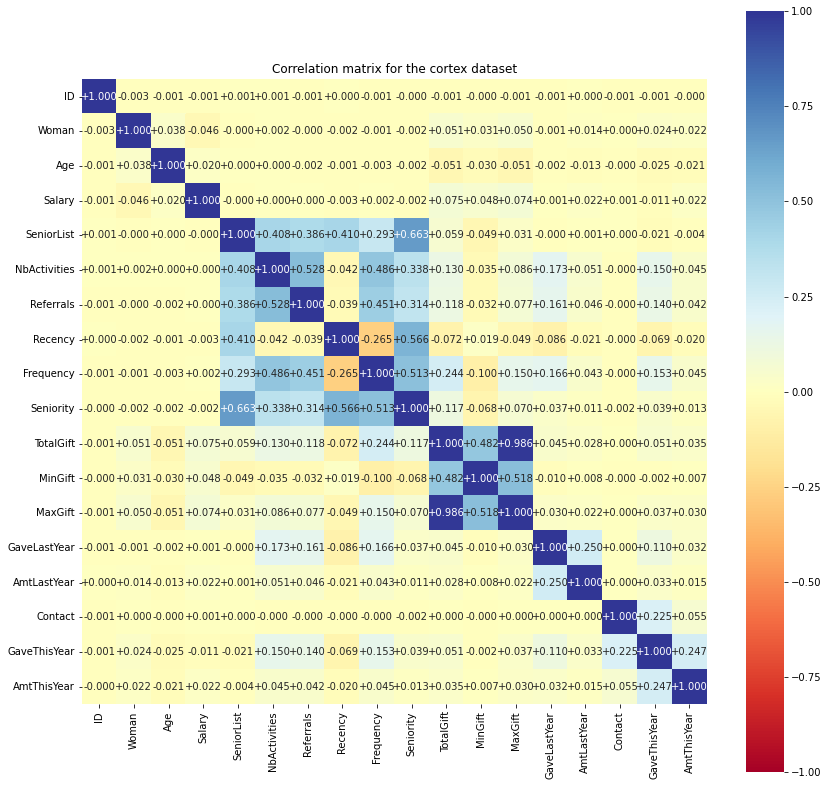

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the cortex dataset")

In [ ]:
pd.crosstab(df['GaveThisYear'], df['Woman'])

Woman,0.0,1.0
GaveThisYear,,
0.0,423905,453863
1.0,59159,63073


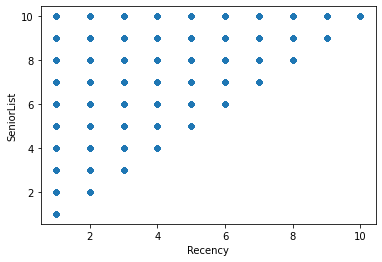

In [ ]:
df.plot('Recency', 'SeniorList', kind = "scatter")

In [ ]:
df.groupby(['Education']).agg(['min', 'max', 'mean'])[['AmtThisYear']]

AmtThisYear                   
                             min      max      mean
Education                                          
Elementary                   0.0   9000.0  6.907370
High School                  0.0  10000.0  6.975871
University / College         0.0  10000.0  8.160051

In [ ]:
df.groupby(['Seniority']).agg(['count', 'mean'])[['TotalGift']]

TotalGift            
              count        mean
Seniority                      
1.0           49262   58.971114
2.0           46771   75.031109
3.0           44318   81.646396
4.0           41385   95.313640
5.0           37847  107.472059
6.0           34260  121.647402
7.0           29766  136.661123
8.0           24359  155.548463
9.0           18179  174.367952
10.0          10187  185.760774

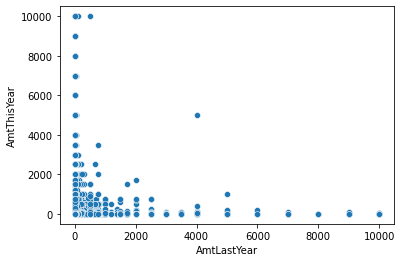

In [ ]:
sns.scatterplot(data=df, x ='AmtLastYear', y='AmtThisYear')

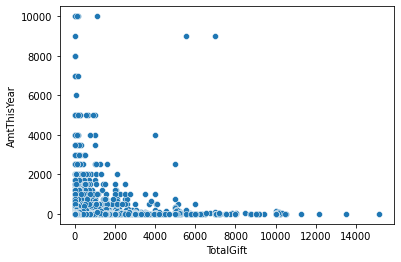

In [ ]:
sns.scatterplot(data=df, x ='TotalGift', y='AmtThisYear')

In [ ]:
df.groupby(['SeniorList']).agg(['count', 'mean'])[['AmtThisYear']]

AmtThisYear          
                 count      mean
SeniorList                      
0.0             166199  7.753145
1.0              83241  7.894968
2.0              83697  8.049990
3.0              83333  8.093492
4.0              83914  7.595038
5.0              83236  7.520003
6.0              83463  7.931539
7.0              83380  7.528844
8.0              83091  7.703060
9.0              83129  7.244884
10.0             83317  7.823013

## Preprocesamiento

In [ ]:
def drop_name(df):
  return df.drop(columns=['LastName', 'FirstName'])

def drop_id(df):
  return df.drop(columns=['ID'])

### Variables Dummys

In [ ]:
def education_dummies(df):
  df = pd.concat([df, pd.get_dummies(df["Education"])], axis = 1)
  return df.drop('Education', axis=1)

def city_dummies(df):
  df = pd.concat([df, pd.get_dummies(df["City"])], axis = 1)
  return df.drop('City', axis=1)

#### Missing Values

In [ ]:
def fill_na_values(MAX_FILL, df):
  df.loc[df['Recency'].isna(), 'Recency'] = MAX_FILL
  df.loc[df['Frequency'].isna(), 'Frequency'] = 0
  df.loc[df['Seniority'].isna(), 'Seniority'] = MAX_FILL
  df.loc[df['TotalGift'].isna(), 'TotalGift'] = 0
  df.loc[df['MinGift'].isna(), 'MinGift'] = 0
  df.loc[df['MaxGift'].isna(), 'MaxGift'] = 0
  return df

In [ ]:
def rename_columns_last_year(df):
  return df.rename(columns = {"AmtLastYear" : "AmtGiven", "GaveLastYear": "Gave"})

def drop_columns_this_year(df):
  return df.drop(['AmtThisYear', 'GaveThisYear'], axis=1)

In [ ]:
def fill_df2_with_last_year_info(MAX_FILL, df):
  df.loc[df['Gave'] == 1, 'Recency'] = 1
  df.loc[(df['Gave'] == 0) & (df['Recency'] < MAX_FILL), 'Recency'] += 1
  df.loc[df['Gave'] == 1, 'Frequency'] += 1
  df.loc[(df['Gave'] == 1) & (df['Seniority'] == MAX_FILL), 'Seniority'] = 1
  df.loc[df['Seniority'] < MAX_FILL, 'Seniority'] += 1
  df['TotalGift'] += df['AmtGiven']
  df.loc[df['Gave'] == 1 & ((df['MinGift'] > df['AmtGiven']) | (df['MinGift'] == 0)), 'MinGift'] = df['AmtGiven']
  df.loc[(df['MaxGift'] < df['AmtGiven']), 'MaxGift'] = df['AmtGiven']
  return df

In [ ]:
def rename_columns_this_year(df):
  return df.rename(columns = {"AmtThisYear" : "AmtGiven", "GaveThisYear": "Gave"})

def drop_columns_last_year(df):
  return df.drop(['AmtGiven', 'Gave'], axis=1)

In [ ]:
def create_vars(df):
  df['JustGave'] = 0
  df.loc[df['Recency'] == 1, 'JustGave'] = 1
  df['MeanGift'] = df['TotalGift'] / df['Frequency']
  df[['MeanGift']] = df[['MeanGift']].fillna(value=0) 
  return df

In [ ]:
def fill_contact(df):
  df['Contact'] = 0.5
  return df

In [ ]:
MAX_FILL = 100

def general_preprocessing(df, MAX_FILL):
  df = drop_name(df)
  df = education_dummies(df)
  df = city_dummies(df)
  df = fill_na_values(MAX_FILL, df)
  return df

def data_preprocessing_df2(df2, MAX_FILL):
  df2 = fill_df2_with_last_year_info(MAX_FILL, df2)
  df2 = drop_columns_last_year(df2)
  return df2

def preprocessing(df, train, amount):
  df = general_preprocessing(df, MAX_FILL)

  if amount:
    df = rename_columns_last_year(df)
    df2 = df.copy()
    df2 = data_preprocessing_df2(df2, MAX_FILL)

    if train:
      df2 = rename_columns_this_year(df2)
      df = drop_columns_this_year(df)
      data = df.append(df2)
    
    else:
      data = create_vars(df2)

  else:
    data = df

  data = create_vars(data)

  return data


# Amount


In [ ]:
df_amount = preprocessing(df, True, True)
df_amount = df_amount[df_amount['Gave'] == 1]
# df_amount.to_csv('PreprocessedOnlyDonnors.csv', index=False)

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train_amt, validation_amt = train_test_split(df_amount, test_size=0.1, random_state=12345) 

#train.head()
df.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
482541,2482542.0,TORRES,DAVID,0.0,19.0,21400.0,High School,City,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
663521,2663522.0,RAFFEL,CATHERINE,1.0,23.0,184200.0,High School,Suburban,10.0,3.0,...,3.0,8.0,1350.0,100.0,750.0,0.0,0.0,0.0,1.0,500.0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [ ]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train_amt[['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities' ]] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities']] 
Y_valid = validation_amt['AmtGiven']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

62.110981809734604
45836.26212371811
214.09404971581557


## **Regression Tree Model**

In [ ]:
train_amt.columns

Index(['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Gave', 'AmtGiven', 'Elementary', 'High School',
       'University / College', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeRegressor


X_train = train_amt[['Age', 'Woman', 'Frequency', 'Referrals', 'MinGift', 'Woman', 'NbActivities' ]] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Age', 'Woman', 'Frequency', 'Referrals', 'MinGift', 'Woman', 'NbActivities' ]] 
Y_valid = validation_amt['AmtGiven']

DT_model = DecisionTreeRegressor(max_depth=7).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

62.18369097702423
45891.84301465834
214.22381523691138


In [ ]:
from sklearn.tree import DecisionTreeRegressor


X_train = train_amt[['Woman', 'Age', 'Salary', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift']] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Woman', 'Age', 'Salary', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift']] 
Y_valid = validation_amt['AmtGiven']

DT_model = DecisionTreeRegressor(max_depth=7).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

61.749632511872235
45678.53272693626
213.72536753257967


## **K Nieghbors Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train = train_amt[['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities' ]] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities']] 
Y_valid = validation_amt['AmtGiven']

KNN_model = KNeighborsRegressor(n_neighbors=5).fit(X_train,Y_train)

KNN_predict = KNN_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,KNN_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,KNN_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,KNN_predict)))

69.34132420091325
54679.980888201506
233.83750958347446


## **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

X_train = train_amt[['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities' ]] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities']] 
Y_valid = validation_amt['AmtGiven']

Lasso_model = Lasso(alpha=0.2, fit_intercept=False).fit(X_train,Y_train)

Lasso_predict = Lasso_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,Lasso_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,Lasso_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,Lasso_predict)))

12.174554221039
6141.380794015957
78.36696238859815


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## **XGBoost**

In [ ]:
pip install xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
predictors = ['Woman', 'Age', 'Salary', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift']

X_train = train_amt[predictors] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[predictors] 
Y_valid = validation_amt['AmtGiven']

import xgboost as xgb
xgboost = xgb.XGBRegressor(objective="reg:linear", random_state=42, n_estimators=100).fit(X_train,Y_train)

[17:05:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


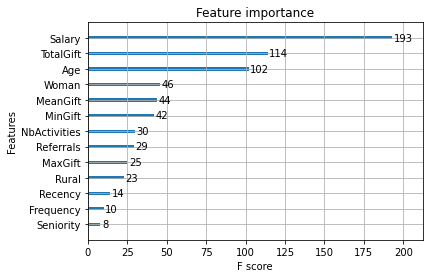

In [ ]:
xgb.plot_importance(xgboost)

In [ ]:
xgboost_predict = xgboost.predict(X_valid) #Predictions on Testing data

In [ ]:
import numpy as np
from sklearn import metrics
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,xgboost_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,xgboost_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,xgboost_predict)))

61.730913775222504
45264.07871166926
212.7535633348341


## Network

In [ ]:
predictors = ['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Rural', 'JustGave', 'MeanGift']


X_train = train_amt[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Rural', 'JustGave',
       'MeanGift']] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Rural', 'JustGave',
       'MeanGift']] 
Y_valid = validation_amt['AmtGiven']

from sklearn.neural_network import MLPRegressor
regrNN = MLPRegressor(random_state=1, max_iter=200, early_stopping=True).fit(X_train, Y_train)
regrNN_predict =regrNN.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

In [ ]:
from sklearn import metrics
import numpy as np
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,regrNN_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regrNN_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regrNN_predict)))

59.08389277812022
38556.737816469285
196.35869681903392


In [ ]:
print(regrNN_predict)

[29.20252395 45.16463621 53.08599437 ... 47.20216061 31.85025979
 51.71864812]


In [ ]:
validation_amt["Prediction"] = regrNN_predict
validation_amt[["AmtGiven", "Prediction"]].sample(30)

,AmtGiven,Pred
499963,20.0,67.146243
902575,20.0,34.029979
230368,200.0,42.866065
866466,10.0,50.941580
540805,20.0,42.462485
110957,150.0,40.405752
312237,25.0,47.129549
61449,30.0,54.665923
847722,20.0,60.486532
326682,20.0,54.937983


## Network Tensorflow

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler_train = preprocessing.MinMaxScaler().fit(X_train)

In [ ]:
X_train = train_amt[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift']] 
Y_train = train_amt['AmtGiven']
X_valid = validation_amt[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift']] 
Y_valid = validation_amt['AmtGiven']

train_X_scaled = pd.DataFrame(scaler_train.transform(X_train)).to_numpy()
test_X_scaled = pd.DataFrame(scaler_train.transform(X_valid)).to_numpy()

input_dim = X_train.shape[1]

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units=6, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=3, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1, activation="relu"))

In [ ]:
# model.compile(
#     optimizer=tf.keras.optimizers.RMSprop(
#         learning_rate=0.001,
#         rho=0.9,
#         momentum=0.999,
#         epsilon=1e-07,
#         centered=False,
#         name='RMSprop'
#     ),
#     loss="categorical_crossentropy",
#     metrics=[tf.keras.metrics.MeanSquaredError()]
# )
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.005,
        rho=0.9,
        momentum=0.999,
        epsilon=1e-07,
        centered=False,
        name='RMSprop'
    ),
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 42        
                                                                 
 dropout_7 (Dropout)         (None, 6)                 0         
                                                                 
 dense_16 (Dense)            (None, 3)                 21        
                                                                 
 dropout_8 (Dropout)         (None, 3)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32
history = model.fit(train_X_scaled, Y_train, 
    epochs=5, 
    steps_per_epoch=len(train_X_scaled)/batch_size, 
    verbose=2,
    validation_split=0.1
)

Epoch 1/5
56250/56250 - 87s - loss: 7130.2231 - mean_squared_error: 7130.2231 - val_loss: 5219.1660 - val_mean_squared_error: 5219.1660 - 87s/epoch - 2ms/step
Epoch 2/5
56250/56250 - 85s - loss: 7144.9106 - mean_squared_error: 7144.9121 - val_loss: 5219.1660 - val_mean_squared_error: 5219.1660 - 85s/epoch - 2ms/step
Epoch 3/5
56250/56250 - 82s - loss: 7148.8623 - mean_squared_error: 7148.8623 - val_loss: 5219.1660 - val_mean_squared_error: 5219.1660 - 82s/epoch - 1ms/step
Epoch 4/5
56250/56250 - 84s - loss: 7347.8633 - mean_squared_error: 7347.8633 - val_loss: 5219.1660 - val_mean_squared_error: 5219.1660 - 84s/epoch - 1ms/step
Epoch 5/5


56250/56250 - 79s - loss: 7039.6074 - mean_squared_error: 7039.6074 - val_loss: 5219.1660 - val_mean_squared_error: 5219.1660 - 79s/epoch - 1ms/step


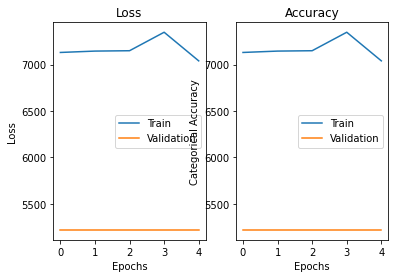

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Categorical Accuracy")
plt.plot(history.history["mean_squared_error"], label="Train")
plt.plot(history.history["val_mean_squared_error"], label="Validation")
plt.legend()

In [ ]:
evaluate = model.evaluate(test_X_scaled, Y_valid)
print("Model Categorical Test Accuracy:", evaluate[1])

6250/6250 [==============================] - 9s 1ms/step - loss: 6216.4126 - mean_squared_error: 6216.4126
Model Categorical Test Accuracy: 6216.41259765625


In [ ]:
y_pred_nn = model.predict(X_valid)
y_pred_nn

6250/6250 [==============================] - 8s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
flatten_arr = np.ravel(y_pred_nn)
# Check if all value in 2D array are equal
result = np.all(y_pred_nn==flatten_arr[0])
print(result)

True


In [ ]:
print(validation_amt.iloc[:, 0])

279337    1.0
776139    1.0
433968    1.0
943618    0.0
318990    0.0
         ... 
732668    0.0
916840    0.0
496423    1.0
860135    0.0
931096    0.0
Name: Woman, Length: 200000, dtype: float64


In [ ]:
results_nn = [X_valid['ID'], y_pred_nn]
results_nn.head()

## Exporting Results to a CSV File

## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
  table='score_rd2_contact',
  libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
  table='score',
  libref='cortex'
)

## Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data_amt = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_amt = preprocessing(scoring_data_amt, False, True)

scoring_data_amt.head()

,ID,Contact,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,...,MinGift,MaxGift,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift
0,2000001.0,1.0,0.0,25.0,107200.0,2.0,0.0,0.0,2.0,2.0,...,10.0,1000.0,0,0,1,0,0,0,0,505.0
1,2000002.0,1.0,1.0,38.0,15800.0,4.0,1.0,1.0,100.0,0.0,...,0.0,0.0,0,1,0,0,1,0,0,0.0
2,2000003.0,1.0,1.0,37.0,57400.0,5.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0,0,1,0,1,0,0,0.0
3,2000004.0,1.0,1.0,78.0,23700.0,3.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0,1,0,0,1,0,0,0.0
4,2000005.0,1.0,1.0,34.0,71900.0,8.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0,0,1,0,1,0,0,0.0


In [ ]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data_amt[['Woman', 'Age', 'Salary', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift']] 
predict_end=xgboost.predict(X)

scoring_data_amt['Prediction'] = predict_end

In [ ]:
scoring_data_amt.head()

,ID,Contact,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,...,MinGift,MaxGift,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift
0,2000001.0,1.0,0.0,25.0,107200.0,2.0,0.0,0.0,2.0,2.0,...,10.0,1000.0,0,0,1,0,0,0,0,505.0
1,2000002.0,1.0,1.0,38.0,15800.0,4.0,1.0,1.0,100.0,0.0,...,0.0,0.0,0,1,0,0,1,0,0,0.0
2,2000003.0,1.0,1.0,37.0,57400.0,5.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0,0,1,0,1,0,0,0.0
3,2000004.0,1.0,1.0,78.0,23700.0,3.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0,1,0,0,1,0,0,0.0
4,2000005.0,1.0,1.0,34.0,71900.0,8.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0,0,1,0,1,0,0,0.0


In [ ]:
scoring_data_amt.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data_amt.head()

,ID,Contact,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,...,MaxGift,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift,Prediction
926183,2926184.0,1.0,1.0,19.0,0.0,6.0,0.0,2.0,1.0,2.0,...,5000.0,0,1,0,1,0,0,1,3500.000000,2923.275391
684037,2684038.0,1.0,1.0,39.0,222200.0,10.0,3.0,0.0,1.0,6.0,...,7000.0,0,0,1,0,0,1,1,1200.833333,2885.614746
996277,2996278.0,1.0,1.0,43.0,98800.0,10.0,5.0,4.0,1.0,4.0,...,7000.0,0,0,1,0,0,1,1,1800.000000,1293.724731
575032,2575033.0,1.0,1.0,32.0,221300.0,10.0,2.0,0.0,2.0,4.0,...,10000.0,0,0,1,0,0,1,0,2812.500000,1117.977661
286775,2286776.0,1.0,1.0,23.0,249000.0,6.0,5.0,3.0,1.0,1.0,...,7000.0,0,0,1,0,0,1,1,7000.000000,1108.883179


In [ ]:
#order = scoring_data_amt.loc[scoring_data_amt['Prediction'] > 25]

In [ ]:
#order.head()

,ID,Contact,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,...,MaxGift,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift,Prediction
364773,2364774.0,1.0,0.0,30.0,250000.0,10.0,3.0,3.0,3.0,2.0,...,150.0,0,0,1,0,0,0,0,87.500000,10000.0
312995,2312996.0,1.0,0.0,34.0,247800.0,10.0,4.0,5.0,3.0,5.0,...,400.0,0,0,1,0,0,0,0,172.000000,10000.0
413897,2413898.0,1.0,0.0,16.0,400.0,0.0,0.0,0.0,1.0,1.0,...,2500.0,0,0,1,0,0,1,1,2500.000000,5000.0
926183,2926184.0,1.0,1.0,19.0,0.0,6.0,0.0,2.0,1.0,2.0,...,5000.0,0,1,0,1,0,0,1,3500.000000,5000.0
27361,2027362.0,1.0,0.0,42.0,151000.0,9.0,5.0,8.0,1.0,6.0,...,40.0,0,0,1,1,0,0,1,19.166667,4000.0


In [ ]:
# if len(order) > 140000:
#   order = order.head(140000)

# len(order)

140000

In [ ]:
amounts = scoring_data_amt[['ID', 'Prediction']].astype(int)

In [ ]:
amounts.to_csv('Round2_Output_amt_XGB.csv', index=False)

# ROUND 2

In [ ]:
df.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Treating Missing Values

In [ ]:
df_prob = preprocessing(df, True, False)

In [ ]:
df_prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1000000 non-null  float64
 1   Woman                 1000000 non-null  float64
 2   Age                   1000000 non-null  float64
 3   Salary                1000000 non-null  float64
 4   SeniorList            1000000 non-null  float64
 5   NbActivities          1000000 non-null  float64
 6   Referrals             1000000 non-null  float64
 7   Recency               1000000 non-null  float64
 8   Frequency             1000000 non-null  float64
 9   Seniority             1000000 non-null  float64
 10  TotalGift             1000000 non-null  float64
 11  MinGift               1000000 non-null  float64
 12  MaxGift               1000000 non-null  float64
 13  GaveLastYear          1000000 non-null  float64
 14  AmtLastYear           1000000 non-n

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train_prob, validation_prob = train_test_split(df_prob, test_size=0.4, random_state=12345) 

#train.head()
train_prob.sample(2)

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,...,GaveThisYear,AmtThisYear,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift
760199,2760200.0,1.0,68.0,234700.0,9.0,0.0,0.0,100.0,0.0,100.0,...,0.0,0.0,0,0,1,0,0,0,0,0.0
225949,2225950.0,1.0,65.0,8500.0,4.0,1.0,0.0,4.0,1.0,4.0,...,1.0,50.0,0,0,1,0,0,0,0,50.0


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

predictors = ['Age','GaveLastYear','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train_prob[predictors] 
Y_train = train_prob['GaveThisYear']
X_valid = validation_prob[predictors] 
Y_valid = validation_prob['GaveThisYear']

DT_model_prob = DecisionTreeClassifier(max_depth=4,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model_prob.predict_proba(X_valid) #Predictions on Testing data
DT_predict_prob = DT_model_prob.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model_prob.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.08276662 0.08276662 0.26501448 ... 0.08276662 0.60432402 0.08276662]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict_prob))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.61      0.11      0.18     59787

    accuracy                           0.86    400000
   macro avg       0.73      0.55      0.55    400000
weighted avg       0.82      0.86      0.81    400000



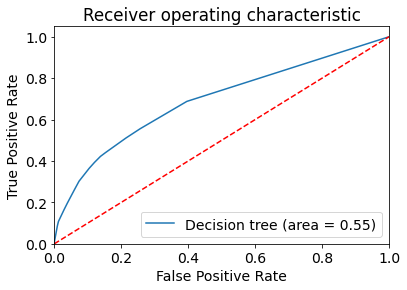

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model_prob.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model_prob.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## XGBoost

In [ ]:
predictors = ['Age','GaveLastYear','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train_prob[predictors] 
Y_train = train_prob['GaveThisYear']
X_valid = validation_prob[predictors] 
Y_valid = validation_prob['GaveThisYear']

xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , Y_train)

xgbc0_predict = xgbc0.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
xgbc0_probs = xgbc0.predict_proba(X_valid)[:, 1]
print(xgbc0_probs)

[0.07287446 0.19217229 0.36993796 ... 0.08738438 0.47183853 0.09020495]


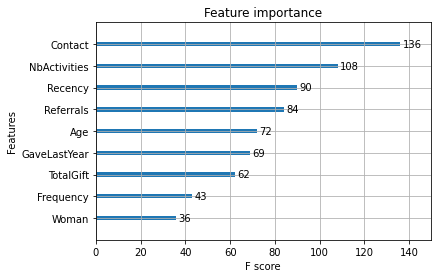

In [ ]:
xgb.plot_importance(xgbc0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, xgbc0_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.61      0.11      0.19     59787

    accuracy                           0.86    400000
   macro avg       0.74      0.55      0.56    400000
weighted avg       0.83      0.86      0.81    400000



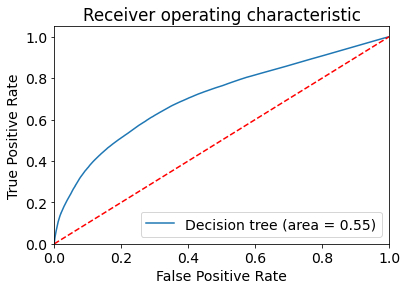

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, xgbc0.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, xgbc0.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## Network

In [ ]:
predictors = ['Age','Woman','GaveLastYear','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train_prob[predictors] 
Y_train = train_prob['GaveThisYear']
X_valid = validation_prob[predictors] 
Y_valid = validation_prob['GaveThisYear']

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', random_state=1, max_iter = 200,
                    early_stopping = True).fit(X_train, Y_train)
clf_predict = clf.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, clf_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.61      0.09      0.16     59787

    accuracy                           0.86    400000
   macro avg       0.74      0.54      0.54    400000
weighted avg       0.82      0.86      0.81    400000



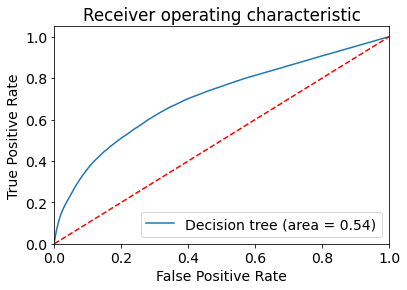

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

clf_roc_auc = roc_auc_score(Y_valid, clf.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, clf.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## SVM

In [ ]:
predictors = ['Age','Woman','GaveLastYear','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train_prob[predictors] 
Y_train = train_prob['GaveThisYear']
X_valid = validation_prob[predictors] 
Y_valid = validation_prob['GaveThisYear']

from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3).fit(X_train, Y_train)
calibrated_clf_prob = calibrated_clf.predict(X_valid) #Predictions on Testing data
calibrated_clf_probs = calibrated_clf.predict_proba(X_valid)[:, 1]
print(calibrated_clf_probs)

NotFittedError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, calibrated_clf_prob))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    340213
         1.0       0.00      0.00      0.00     59787

    accuracy                           0.85    400000
   macro avg       0.43      0.50      0.46    400000
weighted avg       0.72      0.85      0.78    400000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


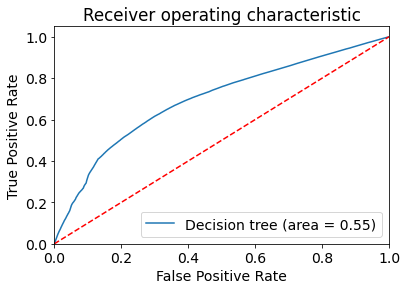

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

calibrated_clf_roc_auc = roc_auc_score(Y_valid, calibrated_clf.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, calibrated_clf.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [ ]:
predictors = ['Age','Woman','GaveLastYear','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train_prob[predictors] 
Y_train = train_prob['GaveThisYear']
X_valid = validation_prob[predictors] 
Y_valid = validation_prob['GaveThisYear']

from sklearn.ensemble import RandomForestClassifier
DTC_model = RandomForestClassifier().fit(X_train,Y_train)
DTC_predict_proba = DTC_model.predict_proba(X_valid) #Predictions on Testing data
DTC_predict_prob = DTC_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DTC_probs = DTC_model.predict_proba(X_valid)[:, 1]
print(DTC_probs)

[0.         0.02       0.29       ... 0.09934447 0.75916667 0.08577843]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict_prob))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.62      0.10      0.18     59787

    accuracy                           0.86    400000
   macro avg       0.74      0.55      0.55    400000
weighted avg       0.83      0.86      0.81    400000



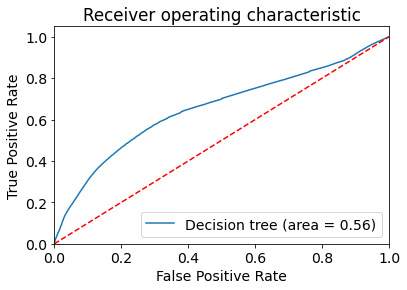

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DTC_roc_auc = roc_auc_score(Y_valid, DTC_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DTC_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DTC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## Tensorflow

In [ ]:
predictors = ['Age','Woman','GaveLastYear','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train_prob[predictors] 
Y_train = train_prob['GaveThisYear']
X_valid = validation_prob[predictors] 
Y_valid = validation_prob['GaveThisYear']

import tensorflow as tf
# Crear el modelo
model_tf = tf.keras.Sequential()
model_tf.add(tf.keras.layers.Dense(units = 5, activation = "relu", input_dim = X_train.shape[1]))
model_tf.add(tf.keras.layers.Dropout(0.25))
model_tf.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [ ]:

# Compilar el modelo
model_tf.compile(
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=0.001,
        momentum=0.9,
        nesterov=False,
        name='SGD',
    ),
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
batch_size = 32
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model_tf.fit(
    X_train, 
    Y_train, 
    epochs = 25, 
    verbose = 2, 
    steps_per_epoch = len(X_train)/batch_size,
    validation_split = 0.2
)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/25
18750/18750 - 31s - loss: 0.4221 - binary_accuracy: 0.8504 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 31s/epoch - 2ms/step
Epoch 2/25
18750/18750 - 33s - loss: 0.4214 - binary_accuracy: 0.8508 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 33s/epoch - 2ms/step
Epoch 3/25
18750/18750 - 30s - loss: 0.4220 - binary_accuracy: 0.8504 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 30s/epoch - 2ms/step
Epoch 4/25
18750/18750 - 30s - loss: 0.4220 - binary_accuracy: 0.8504 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 30s/epoch - 2ms/step
Epoch 5/25
18750/18750 - 31s - loss: 0.4215 - binary_accuracy: 0.8507 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 31s/epoch - 2ms/step
Epoch 6/25
18750/18750 - 30s - loss: 0.4218 - binary_accuracy: 0.8505 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 30s/epoch - 2ms/step
Epoch 7/25
18750/18750 - 30s - loss: 0.4223 - binary_accuracy: 0.8503 - val_loss: 0.4217 - val_binary_accuracy: 0.8506 - 30

18750/18750 - 20s - loss: 0.4219 - binary_accuracy: 0.8505 - val_loss: 0.4216 - val_binary_accuracy: 0.8506 - 20s/epoch - 1ms/step
Modelo entrenado


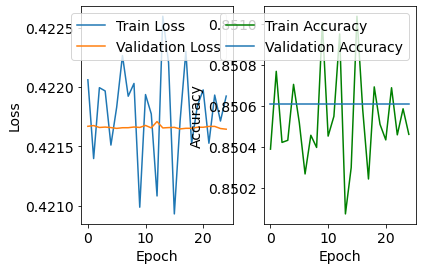

In [ ]:
# Graficar la pérdida
plt.subplot(1, 2, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"], label='Train Loss')
plt.plot(historia.history["val_loss"], label='Validation Loss')
plt.legend()

# Graficar el accuracy
plt.subplot(1, 2, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green", label='Train Accuracy')
plt.plot(historia.history["val_binary_accuracy"], label='Validation Accuracy')

plt.legend()
plt.show()


In [ ]:
evaluate = model_tf.evaluate(X_valid, Y_valid)
print(evaluate)

12500/12500 [==============================] - 18s 1ms/step - loss: 0.4218 - binary_accuracy: 0.8505
[0.4217955470085144, 0.8505324721336365]


## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
  table='score',
  libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
  table='score_rd2_contact',
  libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
  table='SCORE_RD2_NOCONTACT',
  libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [ ]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [ ]:
# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact = preprocessing(scoring_data_contact, False, False)

scoring_data_contact.head()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,...,AmtLastYear,Contact,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift
0,2000001.0,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,...,0.0,1.0,0,0,1,0,0,0,1,505.0
1,2000002.0,1.0,38.0,15800.0,4.0,1.0,1.0,100.0,0.0,100.0,...,0.0,1.0,0,1,0,0,1,0,0,0.0
2,2000003.0,1.0,37.0,57400.0,5.0,0.0,0.0,100.0,0.0,100.0,...,0.0,1.0,0,0,1,0,1,0,0,0.0
3,2000004.0,1.0,78.0,23700.0,3.0,0.0,0.0,100.0,0.0,100.0,...,0.0,1.0,0,1,0,0,1,0,0,0.0
4,2000005.0,1.0,34.0,71900.0,8.0,0.0,0.0,100.0,0.0,100.0,...,0.0,1.0,0,0,1,0,1,0,0,0.0


In [ ]:
X = scoring_data_contact[predictors] 

In [ ]:
DT_predict_contact = DT_model_prob.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.335571
1,2000002.0,0.579336
2,2000003.0,0.582533
3,2000004.0,0.348969
4,2000005.0,0.582533


#### Tensorflow

In [ ]:
y_pred_contact = model_tf.predict(X)
scoring_data_contact['Prediction_prob'] = y_pred_contact
scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()


31250/31250 [==============================] - 45s 1ms/step


,ID,ProbContact
0,2000001.0,0.148526
1,2000002.0,0.148526
2,2000003.0,0.148526
3,2000004.0,0.148526
4,2000005.0,0.148526


### Predict 'probability of giving' for members who were not contacted

In [ ]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

scoring_data_nocontact = preprocessing(scoring_data_nocontact, False, False)
scoring_data_nocontact.head()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,...,AmtLastYear,Contact,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift
0,2000001.0,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0,0,1,0,0,0,1,505.0
1,2000002.0,1.0,38.0,15800.0,4.0,1.0,1.0,100.0,0.0,100.0,...,0.0,0.0,0,1,0,0,1,0,0,0.0
2,2000003.0,1.0,37.0,57400.0,5.0,0.0,0.0,100.0,0.0,100.0,...,0.0,0.0,0,0,1,0,1,0,0,0.0
3,2000004.0,1.0,78.0,23700.0,3.0,0.0,0.0,100.0,0.0,100.0,...,0.0,0.0,0,1,0,0,1,0,0,0.0
4,2000005.0,1.0,34.0,71900.0,8.0,0.0,0.0,100.0,0.0,100.0,...,0.0,0.0,0,0,1,0,1,0,0,0.0


In [ ]:
X = scoring_data_nocontact[predictors] 

In [ ]:
DT_predict_nocontact=DT_model_prob.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.159601
1,2000002.0,0.115173
2,2000003.0,0.075812
3,2000004.0,0.075578
4,2000005.0,0.075812


In [ ]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
224499,2224500.0,0.299575,0.087384
871544,2871545.0,0.580244,0.082905
589381,2589382.0,0.423575,0.263886
436744,2436745.0,0.358629,0.089038
156761,2156762.0,0.365597,0.077013
747373,2747374.0,0.231386,0.115347
747048,2747049.0,0.582533,0.075812
666996,2666997.0,0.365597,0.077013
736744,2736745.0,0.353282,0.082952
277568,2277569.0,0.617489,0.151939


#### Tensorflow

In [ ]:
y_pred_no_contact = model_tf.predict(X)
scoring_data_nocontact['Prediction_prob'] = y_pred_no_contact
scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()


31250/31250 [==============================] - 40s 1ms/step


,ID,ProbNoContact
0,2000001.0,0.148526
1,2000002.0,0.148526
2,2000003.0,0.148526
3,2000004.0,0.148526
4,2000005.0,0.148526


## Exporting Results to a CSV File

In [ ]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [ ]:
import pandas as pd

NB = 180000

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt_XGB.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['ProbContact'] - raw_data['ProbNoContact']) * raw_data['Prediction'])

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['ProbContact', 'Prediction', 'Uplift'], ascending=False, inplace=True)
raw_submission.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 15 to 999997
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ID             1000000 non-null  float64
 1   ProbContact    1000000 non-null  float64
 2   ProbNoContact  1000000 non-null  float64
 3   Prediction     1000000 non-null  int64  
 4   Uplift         1000000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 45.8 MB


In [ ]:
#submission = raw_submission.head(NB)

raw_submission.head(190000)

,ID,ProbContact,ProbNoContact,Prediction,Uplift
15,2742732.0,0.774129,0.170301,661,399.129988
16,2890748.0,0.774129,0.377560,655,259.752547
17,2778339.0,0.774129,0.377560,636,252.217740
20,2268429.0,0.774129,0.377560,616,244.286364
22,2527387.0,0.774129,0.170301,602,363.504165
...,...,...,...,...,...
759009,2543664.0,0.604324,0.082767,44,22.948525
759010,2223492.0,0.604324,0.082767,44,22.948525
759011,2110914.0,0.604324,0.082767,44,22.948525
759012,2589867.0,0.604324,0.082767,44,22.948525


In [ ]:
#submission = raw_submission.loc[(raw_submission['Uplift'] > 25) & (raw_submission['Prediction'] > 25)]
#if len(submission) > NB:
submission = raw_submission.head(NB)
print(len(submission))
submission.head()

180000


,ID,ProbContact,ProbNoContact,Prediction,Uplift
15,2742732.0,0.774129,0.170301,661,399.129988
16,2890748.0,0.774129,0.377560,655,259.752547
17,2778339.0,0.774129,0.377560,636,252.217740
20,2268429.0,0.774129,0.377560,616,244.286364
22,2527387.0,0.774129,0.170301,602,363.504165


In [ ]:
submission.head(170000)

,ID,ProbContact,ProbNoContact,Prediction,Uplift
15,2742732.0,0.774129,0.170301,661,399.129988
16,2890748.0,0.774129,0.377560,655,259.752547
17,2778339.0,0.774129,0.377560,636,252.217740
20,2268429.0,0.774129,0.377560,616,244.286364
22,2527387.0,0.774129,0.170301,602,363.504165
...,...,...,...,...,...
530631,2290262.0,0.604324,0.082767,53,27.642542
530632,2029624.0,0.604324,0.082767,53,27.642542
530633,2958248.0,0.604324,0.082767,53,27.642542
530634,2547416.0,0.604324,0.082767,53,27.642542


In [ ]:
Result = submission[['ID']].astype(int)
Result.to_csv('Round2 Output final XGB2.csv', index=False)